### How can RNN be used for Image classification?

- image pixels can be flattened into a vector that can then be used as a sequence data
- think of RNN as a type of image scanner (scanning flattened pixels, top to bottom)

##### Multi-Dimensional Time Series = T x D matrix

    - T: No. of timestamps
    - D: No. of features

##### Image data dimension = H x W matrix (height x width)

    - can pretend image is a time series

##### pseudocode

    1. Load data (MNIST) (N x T x D), T x D = H x W = 28 x 28
    2. Init model -> LSTM
    3. Train model

#### Images are considered long-distance sequence data

    - model needs to remember info. from cycles back to make accurate predictions


In [10]:
import tensorflow as tf

from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1 Load MNist data


In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255., x_test / 255.
print(f"x_train.shape: {x_train.shape}")

11490434/11490434 [==============================] - 2s 0us/step
x_train.shape: (60000, 28, 28)


### 2 Build LSTM model


In [5]:
M = 128 # no. of hidden nodes
K = 10 # no. of output nodes (10 classes)

input = Input(shape=x_train[0].shape)
x = LSTM(M)(input)
x = Dense(K, activation='softmax')(x)

lstm_model = Model(input, x)

### 3 Compile & train


In [6]:
lstm_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

lstm_result = lstm_model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=10
)

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3455 - accuracy: 0.8898 - val_loss: 0.1411 - val_accuracy: 0.9541
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1054 - accuracy: 0.9691 - val_loss: 0.1027 - val_accuracy: 0.9665
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0738 - accuracy: 0.9780 - val_loss: 0.0577 - val_accuracy: 0.9818
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0558 - accuracy: 0.9831 - val_loss: 0.0614 - val_accuracy: 0.9820
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0457 - accuracy: 0.9868 - val_loss: 0.0495 - val_accuracy: 0.9843
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0386 - accuracy: 0.9875 - val_loss: 0.0528 - val_accuracy: 0.9829
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0346 - accuracy: 0.9893 - val_loss: 0.0491 - val_ac

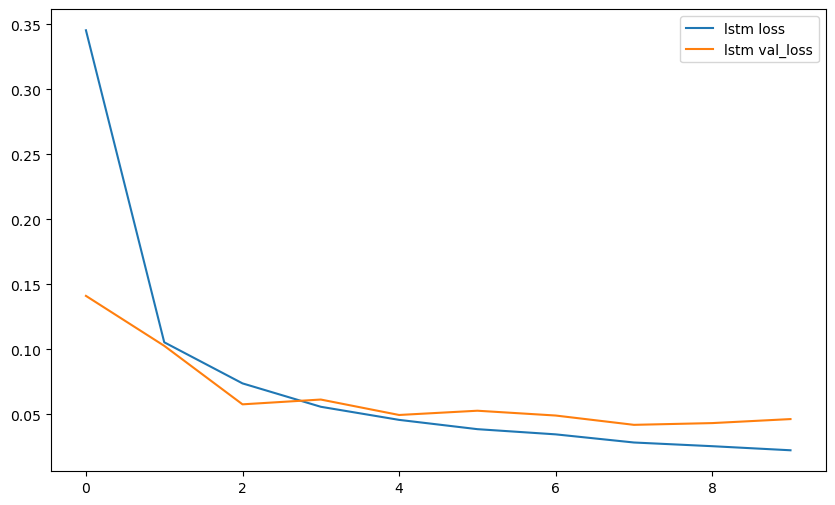

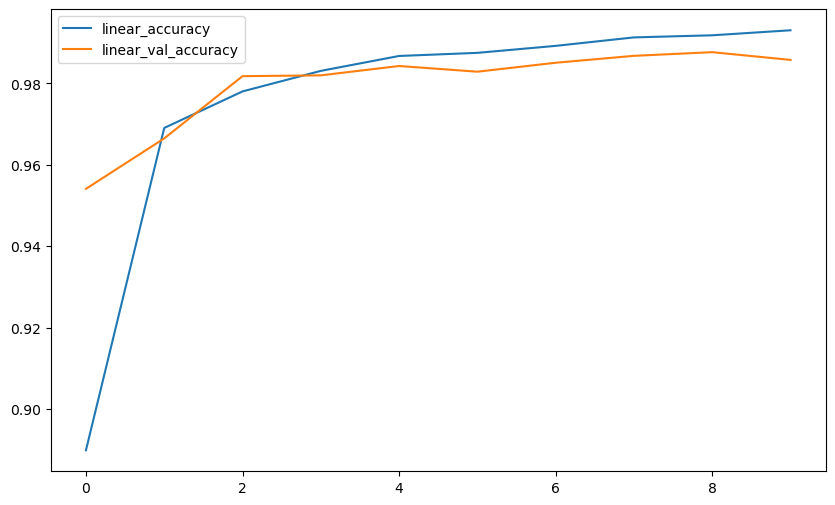

In [9]:
plt.figure(figsize=(10,6))
plt.plot(lstm_result.history['loss'], label='lstm loss')
plt.plot(lstm_result.history['val_loss'], label='lstm val_loss')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(lstm_result.history['accuracy'], label='linear_accuracy')
plt.plot(lstm_result.history['val_accuracy'], label='linear_val_accuracy')
plt.legend()
plt.show()

### Model Prediction & Confusion Matrix


313/313 [==============================] - 1s 3ms/step


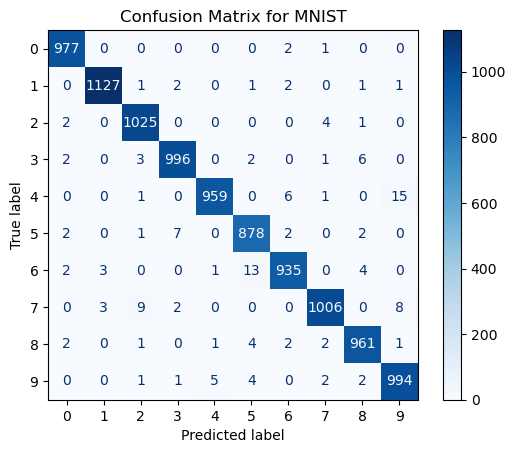

In [11]:
y_pred = lstm_model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for MNIST")
plt.show()

### Show some misclassified examples


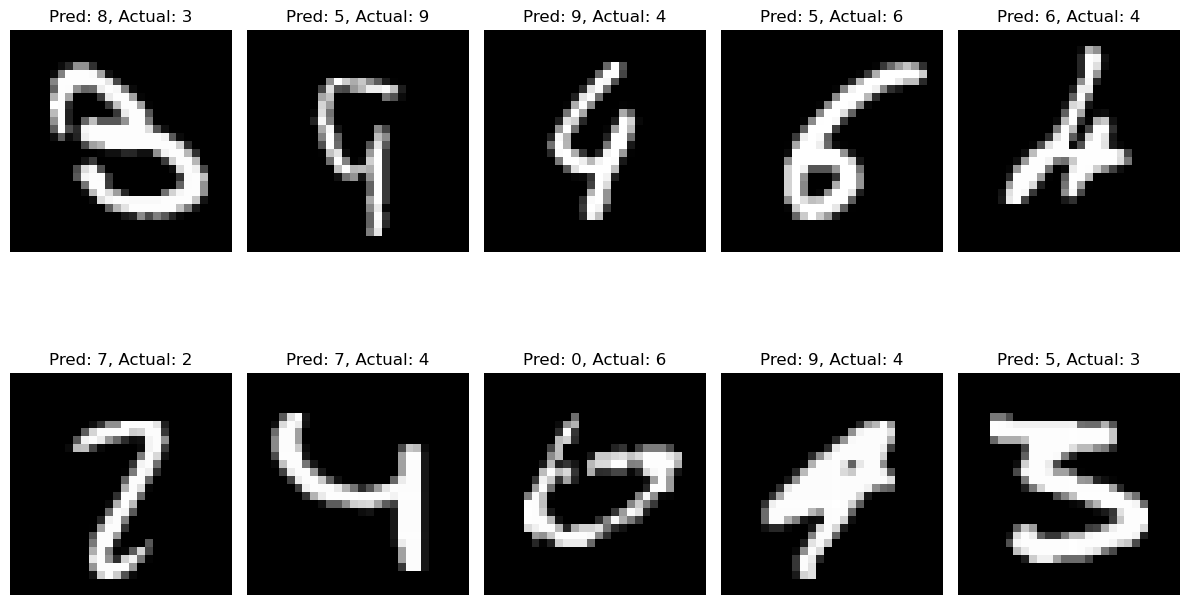

In [13]:
misclassified_idx = np.where( y_pred_labels != y_test)[0]

def plot_misclassified_images(X, y_true, y_pred, indices, num_images=10):
    plt.figure(figsize=(12, 8))
    for i, idx in enumerate(indices[:num_images]):
        plt.subplot(2, 5, i + 1)
        plt.imshow(X[idx], cmap='gray')
        plt.title(f"Pred: {y_pred[idx]}, Actual: {y_true[idx]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_misclassified_images(x_test, y_test, y_pred_labels, misclassified_idx)